![Bikeshare Insights Header Image](bike_share_header.png)


# Bikeshare Insights: Summer in the Windy City 

This dataset contains information on Divvy Bikes, a bikeshare program that provides residents and visitors of Chicago with a convenient way to explore the city. 

The workspace is set up with one CSV file containing bikeshare activities at the peak of the summer-July 2023. Columns include ride ID, bike type, start and end times, station names and IDs, location coordinates, and member type. Feel free to make this workspace yours by adding and removing cells, or editing any of the existing cells.

[Source: Divvy Bikes](https://divvybikes.com/system-data)

### 🌎 **Some guiding questions to help you explore this data:**
1. How many observations are in the dataset? Are there null values? 
2. How would you clean and prepare the data for analysis?
3. Which bike types are popular and which ones aren't? Check if being a member or casual rider makes a difference in bike choice.
4. Time check! What are the peak and off-peak riding times during the day?

### 📊 **Visualization ideas**
- Bar chart: Display the number of times each bike type is used to identify the most and least used bikes.
- Grouped bar chart: Compare bike usage by member type (member vs. casual) to see if it affects bike choice.
- Heatmap: Vividly illustrate the popularity of bikes at different times during the day and week.

## **DIVVY BIKE-SHARE ANALYSIS**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

divvy_july2023 = pd.read_parquet("202307-divvy-tripdata.parquet")
divvy_july2023.head()

ride_id  rideable_type  ...    end_lng member_casual
0  9340B064F0AEE130  electric_bike  ... -87.653041        member
1  D1460EE3CE0D8AF8   classic_bike  ... -87.648384        member
2  DF41BE31B895A25E   classic_bike  ... -87.677692        member
3  9624A293749EF703  electric_bike  ... -87.641190        member
4  2F68A6A4CDB4C99A   classic_bike  ... -87.638181        member

[5 rows x 13 columns]

In [3]:
# create a copy of the dataset

divvy_trips = divvy_july2023.copy()

In [4]:
#check the summary of the dataset

divvy_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767650 entries, 0 to 767649
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             767650 non-null  object 
 1   rideable_type       767650 non-null  object 
 2   started_at          767650 non-null  object 
 3   ended_at            767650 non-null  object 
 4   start_station_name  644707 non-null  object 
 5   start_station_id    644707 non-null  object 
 6   end_station_name    637346 non-null  object 
 7   end_station_id      637346 non-null  object 
 8   start_lat           767650 non-null  float64
 9   start_lng           767650 non-null  float64
 10  end_lat             766396 non-null  float64
 11  end_lng             766396 non-null  float64
 12  member_casual       767650 non-null  object 
dtypes: float64(4), object(9)
memory usage: 76.1+ MB


Check for null values and the percentage of each column that are null

In [5]:
# check for null values, non-null values, % of null values, unique count breakdown

def divvy_trips_info():
    trips = pd.DataFrame(index=divvy_trips.columns)
    trips['Datatype'] = divvy_trips.dtypes
    trips['Non Null Values'] = divvy_trips.count()
    trips['Null Values'] = divvy_trips.isna().sum()
    trips['Percentage of Null Values'] = (divvy_trips.isna().mean()) * 100
    trips['Unique Count'] = divvy_trips.nunique()
    return trips

divvy_trips_info()

Datatype  ...  Unique Count
ride_id              object  ...        767650
rideable_type        object  ...             3
started_at           object  ...        617777
ended_at             object  ...        619777
start_station_name   object  ...          1253
start_station_id     object  ...          1223
end_station_name     object  ...          1250
end_station_id       object  ...          1221
start_lat           float64  ...        215596
start_lng           float64  ...        210238
end_lat             float64  ...          1566
end_lng             float64  ...          1555
member_casual        object  ...             2

[13 rows x 5 columns]

From the above analysis:

- `start_station_name`, `start_station_id`, `end_station_name`, `end_station_id`, `end_lat` and `end_lng` have null values.

The null values in these columns constitute a minute percentage of the total dataset, which indicate that thae sample is sufficient for analysis. Hence, the column will be dropped.

- `start_at` and `ended_at` are in object datatype

These columns need to be converted to the appropriate datatype.


In [6]:
# drop all null values

divvy_trips = divvy_trips.dropna()

# confirm if null values have been dropped

divvy_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573958 entries, 0 to 767626
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             573958 non-null  object 
 1   rideable_type       573958 non-null  object 
 2   started_at          573958 non-null  object 
 3   ended_at            573958 non-null  object 
 4   start_station_name  573958 non-null  object 
 5   start_station_id    573958 non-null  object 
 6   end_station_name    573958 non-null  object 
 7   end_station_id      573958 non-null  object 
 8   start_lat           573958 non-null  float64
 9   start_lng           573958 non-null  float64
 10  end_lat             573958 non-null  float64
 11  end_lng             573958 non-null  float64
 12  member_casual       573958 non-null  object 
dtypes: float64(4), object(9)
memory usage: 61.3+ MB


In [7]:
# convert 'start_at' and 'end_at' columns to datetime datatype

divvy_trips[["started_at", "ended_at"]] = divvy_trips[["started_at", "ended_at"]].apply(pd.to_datetime)

#check if the datatype has changed

divvy_trips.dtypes


ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [8]:
# check the values in 'rideable_type'

divvy_trips['rideable_type'].unique()

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

In [9]:
# check the values in 'member_casual'

divvy_trips['member_casual'].unique()

array(['member', 'casual'], dtype=object)

We need to create columns to see the ridelength, day of the ride and hour of ride

In [10]:
# create ride_length column to know the duration of each ride in minutes

divvy_trips['ride_length(mins)'] = ((divvy_trips['ended_at'] - divvy_trips['started_at']).dt.seconds // 60)

# create the weekday column of each ride
divvy_trips['weekday'] = divvy_trips['started_at'].dt.strftime('%a')

# create the hour of each ride
divvy_trips['start_hour'] = divvy_trips['started_at'].dt.hour

# create the hour of each ride
divvy_trips['end_hour'] = divvy_trips['ended_at'].dt.hour

divvy_trips

ride_id  rideable_type  ... start_hour end_hour
0       9340B064F0AEE130  electric_bike  ...         20       20
1       D1460EE3CE0D8AF8   classic_bike  ...         17       17
2       DF41BE31B895A25E   classic_bike  ...         10       10
3       9624A293749EF703  electric_bike  ...          8        8
4       2F68A6A4CDB4C99A   classic_bike  ...         15       15
...                  ...            ...  ...        ...      ...
767338  3B228F52743C58B7   classic_bike  ...         13       15
767444  67BE62CFD9B1E3EA  electric_bike  ...         13       13
767535  E771BD59731AEC4D  electric_bike  ...         18       18
767594  70B7A0759219DB7E  electric_bike  ...         13       13
767626  C2B90902C368721D  electric_bike  ...          7        7

[573958 rows x 17 columns]

The dataset said any ride less than a minute is a false, therefore we will be check if there are rows with duration less than a minute

In [11]:
# check if there are trips less than a minute

false_start = divvy_trips[divvy_trips['ride_length(mins)'] < 1]
false_start

ride_id  rideable_type  ... start_hour end_hour
1160    6C97AABFEF96F2F3  electric_bike  ...         14       14
4201    EF7AC32CBF1C3C85  electric_bike  ...          9        9
5970    4FA5693AC75AA11C   classic_bike  ...          5        5
6666    E285CCECB1B4CDD9  electric_bike  ...         14       14
6679    AA7E063C9722D455   classic_bike  ...         18       18
...                  ...            ...  ...        ...      ...
766377  846E2D01656B6FBE  electric_bike  ...         22       22
766685  AD6AA09BF4038126  electric_bike  ...         18       18
767444  67BE62CFD9B1E3EA  electric_bike  ...         13       13
767594  70B7A0759219DB7E  electric_bike  ...         13       13
767626  C2B90902C368721D  electric_bike  ...          7        7

[11086 rows x 17 columns]

From the above analysis, there are 11,086 rows with false start, so they have to be removed

In [13]:
# remove all rows with rides less than 1 minute

divvy_trips = divvy_trips[divvy_trips['ride_length(mins)'] >= 1]

# check if the rows have been removed
divvy_trips[divvy_trips['ride_length(mins)'] < 1]

Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual, ride_length(mins), weekday, start_hour, end_hour]
Index: []

We need to create a start_time column to group the start_hour into the time of the day the ride was taken into (Morning, Afternoon, Evening and Night)

Using [[Britanna Dictionary]](https://www.britannica.com) hour of the day reference to categorise the hour.

- Morning - 5 am to 12 pm (noon)
- Afternoon - 12 pm to 5 pm
- Evening - 5 pm to 9 pm
- Night - 9 pm to 4 am

In [19]:
# create a list of day of the time
daytime = [
    (divvy_trips['start_hour'] <= 4),
    (divvy_trips['start_hour'] <= 12),
    (divvy_trips['start_hour'] <= 17),
    (divvy_trips['start_hour'] <= 21)
]

# create a list of the time of the day
time = ['Night', 'Morning', 'Afternoon', 'Evening']
divvy_trips['start_time'] = np.select(daytime, time, default="Unknown")

divvy_trips.drop('time_of_day', axis=1, inplace=True)

divvy_trips

ride_id  rideable_type  ... end_hour start_time
0       9340B064F0AEE130  electric_bike  ...       20    Evening
1       D1460EE3CE0D8AF8   classic_bike  ...       17  Afternoon
2       DF41BE31B895A25E   classic_bike  ...       10    Morning
3       9624A293749EF703  electric_bike  ...        8    Morning
4       2F68A6A4CDB4C99A   classic_bike  ...       15  Afternoon
...                  ...            ...  ...      ...        ...
766646  F2DF42B8AAE04F47  electric_bike  ...       19    Evening
766803  6E8CC316A81CE970   classic_bike  ...       14  Afternoon
767142  39F7B05BC085158D  electric_bike  ...       23    Unknown
767338  3B228F52743C58B7   classic_bike  ...       15  Afternoon
767535  E771BD59731AEC4D  electric_bike  ...       18    Evening

[562872 rows x 18 columns]

### **Analysis & Visualization**

**1. Which bike is most used?**

In [20]:
# calculate the bike usage

divvy_bike = divvy_trips.groupby(["rideable_type"])["rideable_type"].count()
divvy_bike

rideable_type
classic_bike     355512
docked_bike       17671
electric_bike    189689
Name: rideable_type, dtype: int64

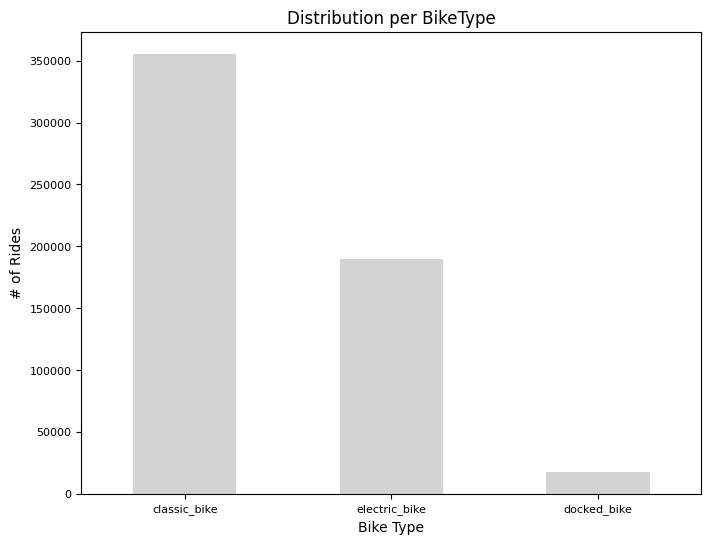

In [36]:
# Create a bar chart
plt.figure(figsize=(8, 6))
divvy_trips["rideable_type"].value_counts().plot(kind="bar", color = 'lightgrey')

# Adding labels and title
plt.xlabel('Bike Type', fontsize=10)
plt.ylabel('# of Rides', fontsize=10)
plt.title('Distribution per BikeType', fontsize=12)

# Set the rotation of x-axis labels to 0 degrees
plt.xticks(rotation = 0, fontsize=8)
plt.yticks(fontsize=8)

# Show the chart
plt.show()

From the above vizualization, classic bikes are the most used while docked bikes are the least used.
Now, we compare bike usage by member type (member vs. casual) to see if it affects bike choice.

2. **What bike is the mostly used by both the member type?**

In [34]:
# compare bike usage among users

divvy_ride_user = divvy_trips.groupby(["rideable_type", "member_casual"])["rideable_type"].count()
divvy_ride_user

rideable_type  member_casual
classic_bike   casual           140140
               member           215372
docked_bike    casual            17671
electric_bike  casual            83091
               member           106598
Name: rideable_type, dtype: int64

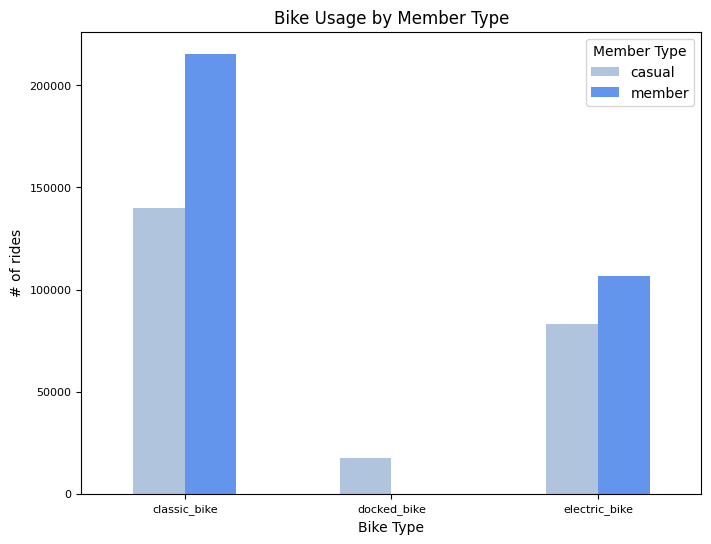

In [56]:
axis = divvy_ride_user.unstack()

# Create a bar chart
ax = axis.plot(kind='bar', figsize=(8, 6), color=['lightsteelblue', 'cornflowerblue'])

# Add labels and a title
plt.xlabel('Bike Type', fontsize=10)
plt.ylabel('# of rides', fontsize=10)
plt.title('Bike Usage by Member Type', fontsize=12)

# Set the rotation of x-axis labels to 0 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=8)

# Setting the font size for y-axis
plt.yticks(fontsize=8)

# Show the plot
plt.legend(title='Member Type')
plt.show()

We see that both member types use classic bike more while only casual users use docked bike. 

Now, we will create a heatmap to illustrate the popularity of bikes at different times during the day and week

 3. **What is the popularity of bikes at different times?**

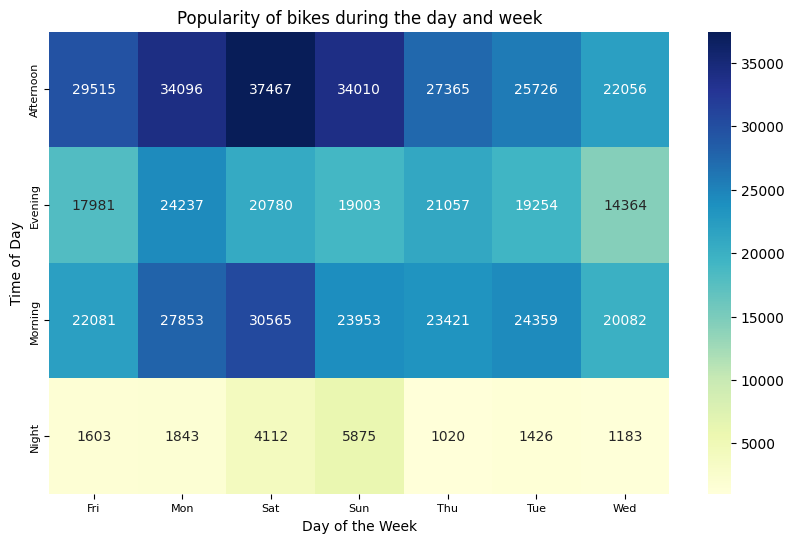

In [58]:
# Create a contingency table
filtered = divvy_trips[divvy_trips['start_time'] != 'Unknown']
time = filtered['start_time'] 
start = filtered['weekday']
contingency_table = pd.crosstab(time, start)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")

# Adding labels and title
plt.xlabel('Day of the Week', fontsize=10)
plt.ylabel('Time of Day', fontsize=10)
plt.title('Popularity of bikes during the day and week', fontsize=12) 

# Set the tick font size
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Show the plot
plt.show()

The most frequent bike time is Saturday afternoon while the least frequent bike time is Thursay night